In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression, Lasso
from sklearn.model_selection import GridSearchCV

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from pandas import Series, DataFrame
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import f1_score,recall_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import mean_squared_error
import seaborn as sns
import xgboost as xgb

In [2]:
df = pd.read_csv("apm_data_cont_v3_11_21_changed.csv") #day wise data
df.dropna().head()

,Date,Sum of User,Sum of Pageview,Sum of Session,Average of BounceRate,Sum of UniquePageview,Average of ExitRate,Sum of OrganicSearch,Sum of Conversions,Y variable,...,Google,Googleads,360,ND,Others,Ref A,Ref R,Yahoo,Youtube,ZG
0,1-Jun,15,16,4,11.538462,15,19.230769,1,0,0,...,11,0,0,0,0,0,0,0,0,0
1,2-Jun,23,41,10,20.714286,23,26.275510,1,0,0,...,1,0,0,0,0,1,0,0,0,0
2,3-Jun,370,569,142,7.323703,408,28.680262,23,2,0,...,55,0,0,0,3,181,0,3,0,0
3,4-Jun,588,817,215,10.221046,648,31.313901,39,3,0,...,128,0,0,0,3,254,0,2,0,0
4,5-Jun,396,530,170,10.426934,436,36.726891,26,2,0,...,119,0,0,0,1,117,0,3,0,0


Converting "sum of conversions" to % conversions and further to categorical y-variable

In [5]:
df['% of conv']=df['Sum of Conversions']/df['Sum of User']
df['y_var']=np.where(df['% of conv']>df['% of conv'].mean(),1,0)
for i in range(16,37):
    df[df.columns[i]]=df[df.columns[i]]/df['Sum of User']

Dropping columns with high correlation

In [6]:
df1=df.drop(['Date','Y variable','Sum of Conversions','Sum of UniquePageview','Year', 'Sum of User','Day of Week','Month','Day','% of conv','Average of BounceRate','Sum of Pageview'],axis=1)
#df1.columns.values
#sns.heatmap(df1.corr(),cmap="YlGnBu")

Spliting into train and test set

In [8]:
#df1=pd.get_dummies(df1,drop_first=True)
X = df1.drop(columns='y_var')
y = df1['y_var']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [9]:
y.value_counts()   # It is a balanced class problem.

1    77
0    76
Name: y_var, dtype: int64

#Logistic Regression

In [10]:
model = LogisticRegression(random_state=42)  # default logistic regression model
model_reg = LogisticRegression(random_state=42,penalty='l1') #logistic regression with penalty

#fitting the models
model.fit(X_train,y_train)
model_reg.fit(X_train,y_train)

#prediction on train
y_pred_prob_tr = model.predict_proba(X_train)
y_pred_prob_reg_tr = model_reg.predict_proba(X_train)

#prediction on test
y_pred_prob = model.predict_proba(X_test)
y_pred_prob_reg = model_reg.predict_proba(X_test)

C:\Users\aadia\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\aadia\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [11]:
mythreshold = 0.4

#train
y_pred1_tr = model.predict(X_train)                     #threshold = 0.5
y_pred1_tr_thres = np.where(y_pred_prob_tr[:,1]>mythreshold,1,0)   #threshold = 0.4


y_pred_tr = model_reg.predict(X_train)                     
y_pred_tr_thres = np.where(y_pred_prob_reg_tr[:,1]>mythreshold,1,0)   



#test
y_pred1 = model.predict(X_test)                     #threshold = 0.5
y_pred1_thres = np.where(y_pred_prob[:,1]>mythreshold,1,0)   #threshold = 0.4


y_pred = model_reg.predict(X_test)                    
y_pred_thres = np.where(y_pred_prob_reg[:,1]>mythreshold,1,0)   



In [12]:
print('--------------------------------normal model with default threshold---------------------------------------')

#train
print("Classification report for normal model with default threshold - train")
print("F1 Score: ", f1_score(y_train, y_pred1_tr))
print("AUROC: ", roc_auc_score(y_train, y_pred_prob_tr[:,1]))
print()
print(classification_report(y_train, y_pred1_tr))



#test
print("Classification report for normal model with default threshold - test")
print("F1 Score: ", f1_score(y_test, y_pred1))
print("AUROC: ", roc_auc_score(y_test, y_pred_prob[:,1]))
print()
print(classification_report(y_test, y_pred1))


print('--------------------------------normal model with changed threshold---------------------------------------')
#train
print("Classification report for normal model with changed threshold - train")
print("F1 Score: ", f1_score(y_train, y_pred1_tr_thres))
print("AUROC: ", roc_auc_score(y_train, y_pred_prob_tr[:,1]))
print()
print(classification_report(y_train, y_pred1_tr_thres))

#test
print("Classification report for normal model with changed threshold - test")
print("F1 Score: ", f1_score(y_test, y_pred1_thres))
print("AUROC: ", roc_auc_score(y_test, y_pred_prob[:,1]))
print()
print(classification_report(y_test, y_pred1_thres))




--------------------------------normal model with default threshold---------------------------------------
Classification report for normal model with default threshold - train
F1 Score:  0.6551724137931035
AUROC:  0.679020979020979

              precision    recall  f1-score   support

           0       0.63      0.56      0.59        52
           1       0.62      0.69      0.66        55

    accuracy                           0.63       107
   macro avg       0.63      0.62      0.62       107
weighted avg       0.63      0.63      0.62       107

Classification report for normal model with default threshold - test
F1 Score:  0.6086956521739131
AUROC:  0.6401515151515151

              precision    recall  f1-score   support

           0       0.64      0.58      0.61        24
           1       0.58      0.64      0.61        22

    accuracy                           0.61        46
   macro avg       0.61      0.61      0.61        46
weighted avg       0.61      0.61      0

In [13]:
print('--------------------------------regularized model with default threshold---------------------------------------')
#train
print("Classification report for regularized model with default threshold - train")
print("F1 Score: ", f1_score(y_train, y_pred_tr))
print("AUROC: ", roc_auc_score(y_train, y_pred_prob_reg_tr[:,1]))
print()
print(classification_report(y_train, y_pred_tr))

#test
print("Classification report for regularized model with default threshold - test")
print("F1 Score: ", f1_score(y_test, y_pred))
print("AUROC: ", roc_auc_score(y_test, y_pred_prob_reg[:,1]))
print()
print(classification_report(y_test, y_pred))

print('--------------------------------regularised model with changed threshold---------------------------------------')
#train
print("Classification report for regularised model with changed threshold - train")
print("F1 Score: ", f1_score(y_train, y_pred_tr_thres))
print("AUROC: ", roc_auc_score(y_train, y_pred_prob_reg_tr[:,1]))
print()
print(classification_report(y_train, y_pred_tr_thres))

#Test
print("Classification report for regularised model with changed threshold - test")
print("F1 Score: ", f1_score(y_test, y_pred_thres))
print("AUROC: ", roc_auc_score(y_test, y_pred_prob_reg[:,1]))
print()
print(classification_report(y_test, y_pred_thres))


--------------------------------regularized model with default threshold---------------------------------------
Classification report for regularized model with default threshold - train
F1 Score:  0.6551724137931035
AUROC:  0.6800699300699301

              precision    recall  f1-score   support

           0       0.63      0.56      0.59        52
           1       0.62      0.69      0.66        55

    accuracy                           0.63       107
   macro avg       0.63      0.62      0.62       107
weighted avg       0.63      0.63      0.62       107

Classification report for regularized model with default threshold - test
F1 Score:  0.6086956521739131
AUROC:  0.6458333333333334

              precision    recall  f1-score   support

           0       0.64      0.58      0.61        24
           1       0.58      0.64      0.61        22

    accuracy                           0.61        46
   macro avg       0.61      0.61      0.61        46
weighted avg       0.61 

The default model is the best - the AUCROC for train and test are very similar. The confusion matrix for the model is below.

In [14]:
con_05 = confusion_matrix(y_test,y_pred1)
print("Confusion matrix when threshold is default = 0.5")
pd.DataFrame(con_05, columns=['pred(neg)', 'pred(pos)'])

Confusion matrix when threshold is default = 0.5


,pred(neg),pred(pos)
0,14,10
1,8,14


Feature Importance based on coefficients

In [15]:
weights = Series(model.coef_[0],
                 index=X_train.columns.values)
weights2 = DataFrame(dict(weights = weights, weights_abs = weights.abs()))
weights2=weights2.sort_values(by='weights_abs',ascending=False)
weights2  = weights2.reset_index().rename(columns={'index': 'Features'})
weights2.head(5)

,Features,weights,weights_abs
0,Average of ExitRate,0.079797,0.079797
1,(direct),-0.039200,0.039200
2,Google,-0.035244,0.035244
3,Sum of OrganicSearch,0.011878,0.011878
4,ZG,0.006608,0.006608


#Random Forest - split based on threshold and then model

In [16]:
df1_rf=df.drop(['Date','Y variable','Sum of Conversions','Sum of UniquePageview','Year', 'Sum of User','Day of Week','Month','Day','% of conv'],axis=1)
df1=pd.get_dummies(df1_rf,drop_first=True)
X_rf = df1_rf.drop(columns='y_var')
y_rf = df1_rf['y_var']
X_train, X_test, y_train, y_test = train_test_split(X_rf,y_rf,test_size=0.3, random_state=42)

In [17]:
rfClassification = RandomForestClassifier(random_state=35) #default parameters
rfClassification.fit(X_train, y_train)

C:\Users\aadia\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=35, verbose=0,
                       warm_start=False)

In [18]:
y_pred_prob = rfClassification.predict_proba(X_test)
y_pred=np.where(y_pred_prob[:,1]>0.5,1,0)

In [19]:
con_05 = confusion_matrix(y_test,y_pred)

print("Confusion matrix when threshold is default = 0.5")
pd.DataFrame(con_05, columns=['pred(neg)', 'pred(pos)'])

Confusion matrix when threshold is default = 0.5


,pred(neg),pred(pos)
0,21,3
1,3,19


In [20]:
#normal model
print("Classification report for normal Random forest classifier")
print("F1 Score: ", f1_score(y_test, y_pred))
print("AUROC: ", roc_auc_score(y_test, y_pred_prob[:,1]))
print()
print(classification_report(y_test, y_pred))

Classification report for normal Random forest classifier
F1 Score:  0.8636363636363636
AUROC:  0.8996212121212122

              precision    recall  f1-score   support

           0       0.88      0.88      0.88        24
           1       0.86      0.86      0.86        22

    accuracy                           0.87        46
   macro avg       0.87      0.87      0.87        46
weighted avg       0.87      0.87      0.87        46



Tuning the model further :

In [21]:
tuned_parameters = [{'n_estimators':[5,10,20],
                     'criterion': ['gini'],
                     'max_depth':[5,10],
                     
                    }
                   ]
clf1 = GridSearchCV(RandomForestClassifier(random_state=30), tuned_parameters, cv=3) #30
clf1.fit(X_train, y_train)
print(clf1.best_params_)

{'criterion': 'gini', 'max_depth': 5, 'n_estimators': 10}


C:\Users\aadia\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [22]:
y_true, y_pred = y_train, clf1.predict(X_train)
y_pred_clf1_prob=clf1.predict_proba(X_train)

#calculating train AUC ROC
false_positive_rate, recall, thresholds = roc_curve(y_train,y_pred_clf1_prob[:,1])
roc_auc = auc(false_positive_rate, recall)
print('AUC score:', roc_auc)

AUC score: 0.9905594405594407


In [23]:
print(classification_report(y_train, y_pred))
roc_auc_score(y_train, y_pred)

              precision    recall  f1-score   support

           0       0.92      0.94      0.93        52
           1       0.94      0.93      0.94        55

    accuracy                           0.93       107
   macro avg       0.93      0.93      0.93       107
weighted avg       0.93      0.93      0.93       107



0.9347902097902098

In [24]:
#Use the best parameters to get the best predictions
y_true, y_pred = y_test, clf1.predict(X_test)
y_pred_clf1_prob=clf1.predict_proba(X_test)

#calculating val AUC score
false_positive_rate, recall, thresholds = roc_curve(y_test,y_pred_clf1_prob[:,1])
roc_auc = auc(false_positive_rate, recall)
print('AUC score:', roc_auc)

AUC score: 0.8920454545454546


In [25]:
print(classification_report(y_test, y_pred))
roc_auc_score(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.78      0.88      0.82        24
           1       0.84      0.73      0.78        22

    accuracy                           0.80        46
   macro avg       0.81      0.80      0.80        46
weighted avg       0.81      0.80      0.80        46



0.8011363636363636

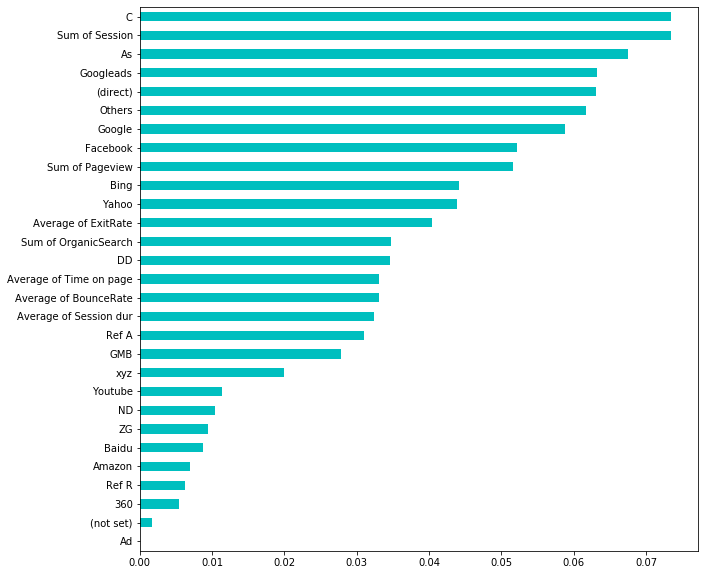

In [26]:
clf1_rf = RandomForestClassifier(random_state=50,criterion= 'gini', max_depth= 10, n_estimators=20)
clf1_rf.fit(X_train, y_train)
feat_importances = pd.Series(clf1_rf.feature_importances_, index=X_train.columns)
plt.figure(figsize=(10,10)) 
feat_importances.sort_values().plot(kind='barh',color='c')
#feat_importances.sort_values(ascending=False)

# RF - Model and then split the prediction based on threshold

Modelled with y-variable as continuous variable

In [27]:
df2=df.drop(['Date','y_var','Y variable','Sum of Conversions','Sum of UniquePageview','Year', 'Sum of User','Day of Week','Month','Day'],axis=1)
df2.columns.values

array(['Sum of Pageview', 'Sum of Session', 'Average of BounceRate',
       'Average of ExitRate', 'Sum of OrganicSearch',
       'Average of Session dur', 'Average of Time on page', '(direct)',
       '(not set)', 'Ad', 'Amazon', 'As', 'Baidu', 'Bing', 'xyz', 'C',
       'DD', 'Facebook', 'GMB', 'Google', 'Googleads', '360', 'ND',
       'Others', 'Ref A', 'Ref R', 'Yahoo', 'Youtube', 'ZG', '% of conv'],
      dtype=object)

In [28]:
df2=pd.get_dummies(df2,drop_first=True)
X_reg = df2.drop(columns='% of conv')
y_reg = df2['% of conv']
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg,y_reg,test_size=0.3, random_state=42)

In [29]:
rfRegression = RandomForestRegressor(random_state = 32)  #45,32
rfRegression.fit(X_train_reg, y_train_reg)

C:\Users\aadia\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=32, verbose=0,
                      warm_start=False)

In [30]:
y_pred_reg = rfRegression.predict(X_test_reg)
y_pred_reg_tr = rfRegression.predict(X_train_reg)
rmse = np.sqrt(mean_squared_error(y_test_reg, y_pred_reg))
rmse_tr = np.sqrt(mean_squared_error(y_train_reg, y_pred_reg_tr))
print("RMSE test: %f" % (rmse))
print("RMSE train: %f" % (rmse_tr))


RMSE test: 0.000822
RMSE train: 0.000407


In [31]:
y_pred_reg_class=np.where(y_pred_reg>df['% of conv'].mean(),1,0)  # converting predicted y into categorical

con = confusion_matrix(y_test,y_pred_reg_class)

print("Confusion matrix when threshold is default = 0.5")
pd.DataFrame(con, columns=['pred(neg)', 'pred(pos)'])

Confusion matrix when threshold is default = 0.5


,pred(neg),pred(pos)
0,21,3
1,7,15


In [32]:
#normal model
print("Classification report for normal Random Forest classifier")
print("F1 Score: ", f1_score(y_test, y_pred_reg_class))
print()
print(classification_report(y_test, y_pred_reg_class))

Classification report for normal Random Forest classifier
F1 Score:  0.7499999999999999

              precision    recall  f1-score   support

           0       0.75      0.88      0.81        24
           1       0.83      0.68      0.75        22

    accuracy                           0.78        46
   macro avg       0.79      0.78      0.78        46
weighted avg       0.79      0.78      0.78        46



Precision has improved compared to the previous model

Feature Importance :

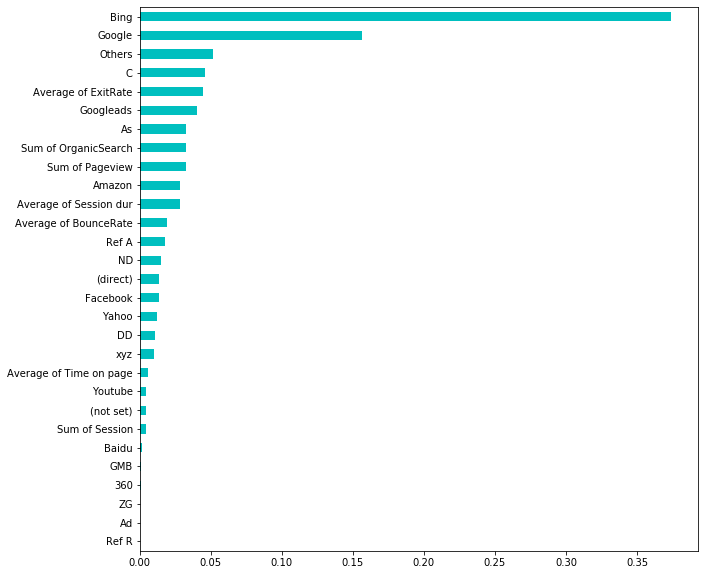

In [33]:
feat_importances = pd.Series(rfRegression.feature_importances_, index=X_train.columns)
plt.figure(figsize=(10,10))
feat_importances.sort_values().plot(kind='barh',color='c')
#feat_importances.sort_values(ascending=False)

#XG Boost

In [34]:
df1_xg=df.drop(['Date','Y variable','Sum of Conversions','Sum of UniquePageview','Year', 'Sum of User','Day of Week','Month','Day','% of conv'],axis=1)
#df1_xg.columns.values

In [35]:
df1_xg=pd.get_dummies(df1_xg,drop_first=True)
X = df1_xg.drop(columns='y_var')
y = df1_xg['y_var']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

# XGB - split based on threshold and then model

modelled with y-variable as categorical variable

In [36]:
xgb_class = xgb.XGBClassifier(random_state = 30)
xgb_class.fit(X_train, y_train)
y_pred_prob = xgb_class.predict_proba(X_test)
y_pred=np.where(y_pred_prob[:,1]>0.5,1,0) 

In [37]:
con_05 = confusion_matrix(y_test,y_pred)

print("Confusion matrix when threshold is default = 0.5")
pd.DataFrame(con_05, columns=['pred(neg)', 'pred(pos)'])

Confusion matrix when threshold is default = 0.5


,pred(neg),pred(pos)
0,19,5
1,4,18


In [38]:
#normal model
print("Classification report for normal XGB classifier")
print("F1 Score: ", f1_score(y_test, y_pred))
print("AUROC: ", roc_auc_score(y_test, y_pred_prob[:,1]))
print()
print(classification_report(y_test, y_pred))

Classification report for normal XGB classifier
F1 Score:  0.8
AUROC:  0.9015151515151516

              precision    recall  f1-score   support

           0       0.83      0.79      0.81        24
           1       0.78      0.82      0.80        22

    accuracy                           0.80        46
   macro avg       0.80      0.80      0.80        46
weighted avg       0.81      0.80      0.80        46



Feature Importance

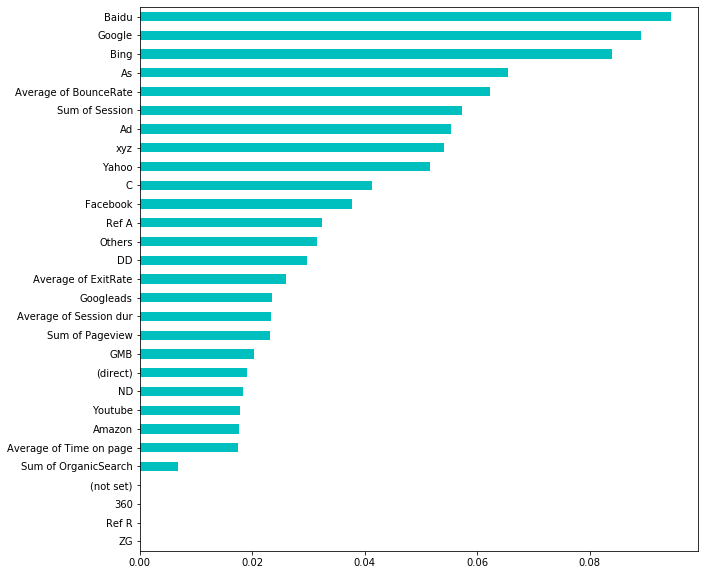

In [39]:
feat_importances = pd.Series(xgb_class.feature_importances_, index=X_train.columns)
plt.figure(figsize=(10,10))
feat_importances.sort_values().plot(kind='barh',color='c')

# Tuning

In [40]:
from sklearn.model_selection import GridSearchCV
tuned_parameters = [{'n_estimators':[5,10,20],
                     'criterion': ['gini'],
                     'max_depth':[5,10],
                     
                    }
                   ]
clf1 = GridSearchCV(xgb_class, tuned_parameters, cv=3)
clf1.fit(X_train, y_train)
print(clf1.best_params_)

{'criterion': 'gini', 'max_depth': 5, 'n_estimators': 20}


C:\Users\aadia\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [41]:
#building the tuned model
xgbClassification = xgb.XGBClassifier(criterion='gini',max_depth=5,n_estimators=10)
xgbClassification.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, criterion='gini', gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=10, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [42]:
#predicting on train set
y_pred_prob = xgbClassification.predict_proba(X_train)
y_pred=np.where(y_pred_prob[:,1]>0.5,1,0)

In [43]:
#calculating train AUC score
false_positive_rate, recall, thresholds = roc_curve(y_train,y_pred_prob[:,1])
roc_auc = auc(false_positive_rate, recall)
print('AUC score:', roc_auc)

AUC score: 0.9979020979020979


In [44]:
print(classification_report(y_train, y_pred))
print("F1 Score: ", f1_score(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        52
           1       0.98      0.98      0.98        55

    accuracy                           0.98       107
   macro avg       0.98      0.98      0.98       107
weighted avg       0.98      0.98      0.98       107

F1 Score:  0.9818181818181818


In [45]:
#Use the best parameters to get the best predictions
y_true, y_pred = y_test, xgbClassification.predict(X_test)
y_pred_clf1_prob=xgbClassification.predict_proba(X_test)
#calculating val AUC score
false_positive_rate, recall, thresholds = roc_curve(y_test,y_pred_clf1_prob[:,1])
roc_auc = auc(false_positive_rate, recall)
print('AUC score:', roc_auc)

AUC score: 0.8598484848484849


In [46]:
print(classification_report(y_test, y_pred))
print("F1 Score: ", f1_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83        24
           1       0.82      0.82      0.82        22

    accuracy                           0.83        46
   macro avg       0.83      0.83      0.83        46
weighted avg       0.83      0.83      0.83        46

F1 Score:  0.8181818181818182


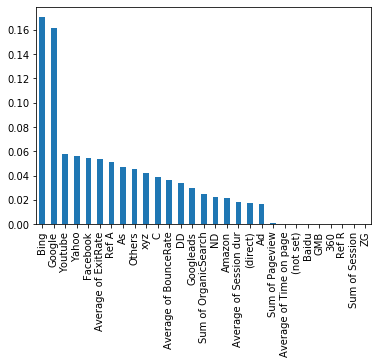

In [47]:
feat_importances = pd.Series(xgbClassification.feature_importances_, index=X_train.columns)
feat_importances.sort_values(ascending=False).plot(kind='bar')

# XGB - Model and then split the prediction based on threshold

modelled with y variable as continuous variable

In [48]:
df2=df.drop(['Date','y_var','Y variable','Sum of Conversions','Sum of UniquePageview','Year', 'Sum of User','Day of Week','Month','Day'],axis=1)


In [49]:
df2=pd.get_dummies(df2,drop_first=True)
X_reg = df2.drop(columns='% of conv')
y_reg = df2['% of conv']
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg,y_reg,test_size=0.3, random_state=42)

In [50]:
xgb_reg = xgb.XGBRegressor(random_state=42)
xgb_reg.fit(X_train_reg, y_train_reg)

[15:46:23] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\aadia\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [51]:
y_pred_reg = xgb_reg.predict(X_test_reg)
y_pred_reg_tr = xgb_reg.predict(X_train_reg)
#y_pred_reg

In [52]:
rmse = np.sqrt(mean_squared_error(y_test_reg, y_pred_reg))
rmse_tr = np.sqrt(mean_squared_error(y_train_reg, y_pred_reg_tr))
print("RMSE test: %f" % (rmse))
print("RMSE train: %f" % (rmse_tr))

RMSE test: 0.000708
RMSE train: 0.000415


In [53]:
y_pred_reg_class=np.where(y_pred_reg>df['% of conv'].mean(),1,0)

In [54]:
con = confusion_matrix(y_test,y_pred_reg_class)

print("Confusion matrix when threshold is default = 0.5")
pd.DataFrame(con, columns=['pred(neg)', 'pred(pos)'])

Confusion matrix when threshold is default = 0.5


,pred(neg),pred(pos)
0,22,2
1,5,17


In [55]:
#normal model
print("Classification report for normal XGB classifier")
print("F1 Score: ", f1_score(y_test, y_pred_reg_class))
#print("AUROC: ", roc_auc_score(y_test, y_pred_prob[:,1]))
print()
print(classification_report(y_test, y_pred_reg_class))

Classification report for normal XGB classifier
F1 Score:  0.8292682926829269

              precision    recall  f1-score   support

           0       0.81      0.92      0.86        24
           1       0.89      0.77      0.83        22

    accuracy                           0.85        46
   macro avg       0.85      0.84      0.85        46
weighted avg       0.85      0.85      0.85        46



The recall is high as compared to the previous xgboost result as it has been modelled with y-variable as a continuous variable. In the previous case, we were losing information.

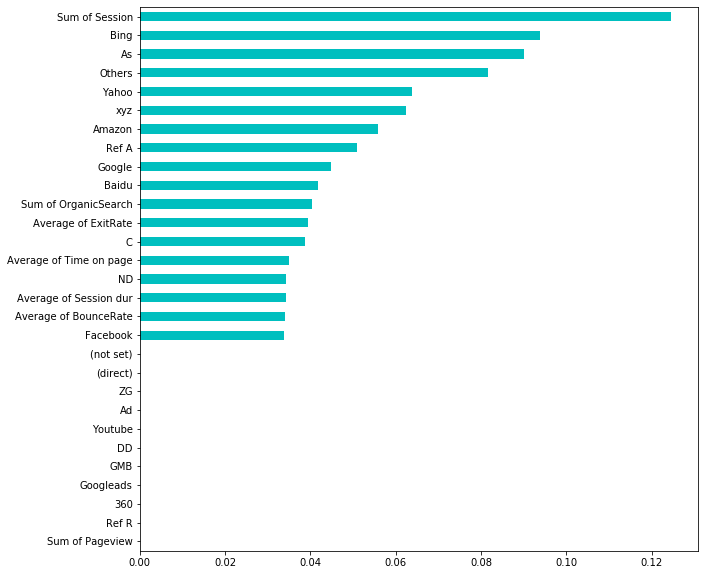

In [56]:
feat_importances = pd.Series(xgb_reg.feature_importances_, index=X_train.columns)
plt.figure(figsize=(10,10))
feat_importances.sort_values().plot(kind='barh',color='c')